In [1]:
import base_compnal
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from tqdm import tqdm

In [2]:
N_list = [100]
polynomial_degree = 3
num_sweeps = 1000
num_samples = 1000
T_list = np.arange(0, 1, 0.1)

In [3]:
bind = []
for N in N_list:
    val = -1.0/scipy.special.binom(N - 1, polynomial_degree - 1)
    lattice = base_compnal.lattice.InfiniteRange(N)
    model = base_compnal.model.PolynomialIsingInfiniteRange(lattice, {polynomial_degree: val})
    solver = base_compnal.solver.ClassicalMonteCarloPolyIsingInfiniteRange(model)
    solver.set_num_sweeps(num_sweeps)
    solver.set_num_samples(num_samples)
    
    mag_list = []
    bind_list = []
    for T in tqdm(T_list):
        solver.set_temperature(T)
        solver.run()
        avg_deg2 = solver.calculate_sample_moment(2)
        avg_deg4 = solver.calculate_sample_moment(4)
        bind_list.append(1 - avg_deg4/(3*avg_deg2*avg_deg2))
    bind.append(bind_list)

100%|██████████| 13/13 [06:15<00:00, 28.90s/it]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


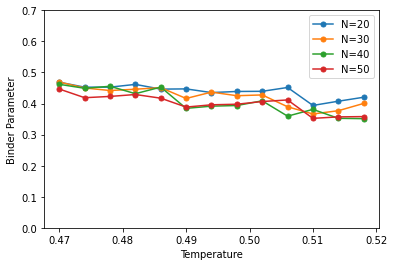

In [4]:
plt.plot(T_list, bind[0],linestyle='solid',marker='.',markersize=10, label="N=20")
plt.plot(T_list, bind[1],linestyle='solid',marker='.',markersize=10, label="N=30")
plt.plot(T_list, bind[2],linestyle='solid',marker='.',markersize=10, label="N=40")
plt.plot(T_list, bind[3],linestyle='solid',marker='.',markersize=10, label="N=50")
plt.ylim(0.0, 0.7)
plt.xlabel("Temperature")
plt.ylabel("Binder Parameter")
plt.legend()
plt.savefig("out2.eps")